In [1]:
# install library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import warnings
warnings.filterwarnings('ignore') # Hides warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)

In [2]:
df=pd.read_excel("C:/Users/hp/Downloads/B08XJCMGL7-IN-Reviews-220608.xlsx")
df=df.iloc[:,2:3]
df

,Content
0,It's been not more than 6 months i bought this...
1,"This phone is completely ridiculous, useless p..."
2,"I am giving reviews after using the phone, pho..."
3,Don't purchase worst phone. Got lacked in 3 mo...
4,Very slow process not compatible. Waist of my...
...,...
15256,Self camera is just like 2 mega pixels.
15257,1. It doesn't work with 5.0GHz WiFi frequency....
15258,Very disappointed with the overall performance...
15259,Camera quality is low


In [3]:
df.shape

(15261, 1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15261 entries, 0 to 15260
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Content  14752 non-null  object
dtypes: object(1)
memory usage: 119.4+ KB


In [5]:
df.isnull().sum()

Content    509
dtype: int64

In [6]:
df.dropna(inplace = True, axis = 0)

In [7]:
df.isnull().sum()

Content    0
dtype: int64

In [8]:
df.shape

(14752, 1)

# 1 . Data Preprocessing

1. Maketext in lower case
2. Remove numbers
3. Remove html tags
4. Remove punctuions
5. Remove Stopwords
6. Remove multiple spaces

In [9]:
#pip install data-purifier

import datapurifier as dp
from datapurifier import Mleda
from datapurifier import Nlpeda
from datapurifier import Nlpurifier
from datapurifier import  MlReport

In [10]:
from datapurifier import Nlpurifier, NLAutoPurifier

df2 = NLAutoPurifier(df, target = "Content")

Dataframe contains 14752 rows and 1 columns

There is no null rows present.

Starting execution of 'lower' function, Please wait...
Finished execution of 'lower' function in 0.017 secs

Starting execution of 'remove_numbers' function, Please wait...
Finished execution of 'remove_numbers' function in 0.057 secs

Starting execution of 'remove_html_tags' function, Please wait...
Finished execution of 'remove_html_tags' function in 1.437 secs

Starting execution of 'convert_accented_chars_to_normal' function, Please wait...
Finished execution of 'convert_accented_chars_to_normal' function in 0.169 secs

Starting execution of 'remove_punctuations' function, Please wait...
Finished execution of 'remove_punctuations' function in 0.109 secs

Starting execution of 'remove_stop_words' function, Please wait...
Finished execution of 'remove_stop_words' function in 0.077 secs

Starting execution of 'remove_multiple_spaces' function, Please wait...
Finished execution of 'remove_multiple_spaces' func

In [11]:
df2

,Content
0,months bought mobile intial days onwards inter...
1,phone completely ridiculous useless phone gett...
2,giving reviews phone phone having issue speake...
3,dont purchase worst phone got lacked months wo...
4,slow process compatible waist money return phone
...,...
15256,self camera like mega pixels
15257,doesnt work ghz wifi frequency ghz old school ...
15258,disappointed overall performance samsung
15259,camera quality low


In [12]:
import nltk
from nltk.stem import WordNetLemmatizer 

In [13]:
lemmatizer = WordNetLemmatizer()
df2['Content'] = df2['Content'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

In [14]:
df2

,Content
0,month bought mobile intial day onwards interne...
1,phone completely ridiculous useless phone gett...
2,giving review phone phone having issue speaker...
3,dont purchase worst phone got lacked month wor...
4,slow process compatible waist money return phone
...,...
15256,self camera like mega pixel
15257,doesnt work ghz wifi frequency ghz old school ...
15258,disappointed overall performance samsung
15259,camera quality low


# 2. Sentiment

## 2.1  [ Textblob ]

In [15]:
#import TextBlob
from textblob import TextBlob

In [16]:
#get sentiment score for each review
df2['polarity_TextBlob'] = df2['Content'].apply(lambda s: TextBlob(s).sentiment.polarity)
df2.head()

,Content,polarity_TextBlob
0,month bought mobile intial day onwards interne...,-0.500000
1,phone completely ridiculous useless phone gett...,-0.416667
2,giving review phone phone having issue speaker...,-1.000000
3,dont purchase worst phone got lacked month wor...,-0.766667
4,slow process compatible waist money return phone,-0.300000


In [17]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label>=0:
        return "Positive"

In [18]:
df2['sentiment_TextBlob'] = df2['polarity_TextBlob'].apply(sentiment)

In [19]:
df2['sentiment_TextBlob'].value_counts()

Positive    11844
Negative     2908
Name: sentiment_TextBlob, dtype: int64

In [20]:
df2.head()

,Content,polarity_TextBlob,sentiment_TextBlob
0,month bought mobile intial day onwards interne...,-0.500000,Negative
1,phone completely ridiculous useless phone gett...,-0.416667,Negative
2,giving review phone phone having issue speaker...,-1.000000,Negative
3,dont purchase worst phone got lacked month wor...,-0.766667,Negative
4,slow process compatible waist money return phone,-0.300000,Negative


##  

<AxesSubplot:xlabel='sentiment_TextBlob', ylabel='count'>

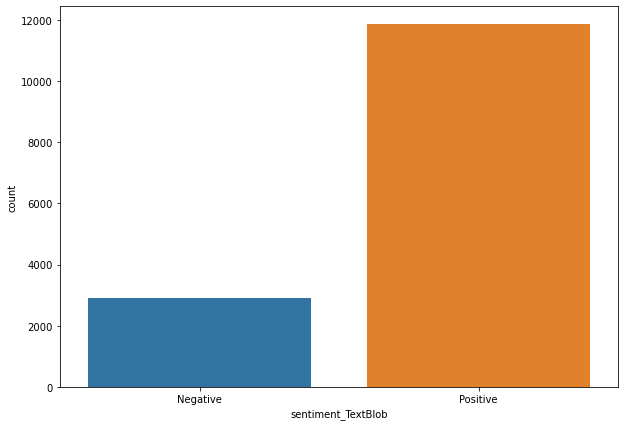

In [21]:
fig = plt.figure(figsize=(10,7))
sns.countplot(x='sentiment_TextBlob', data = df2)

<AxesSubplot:>

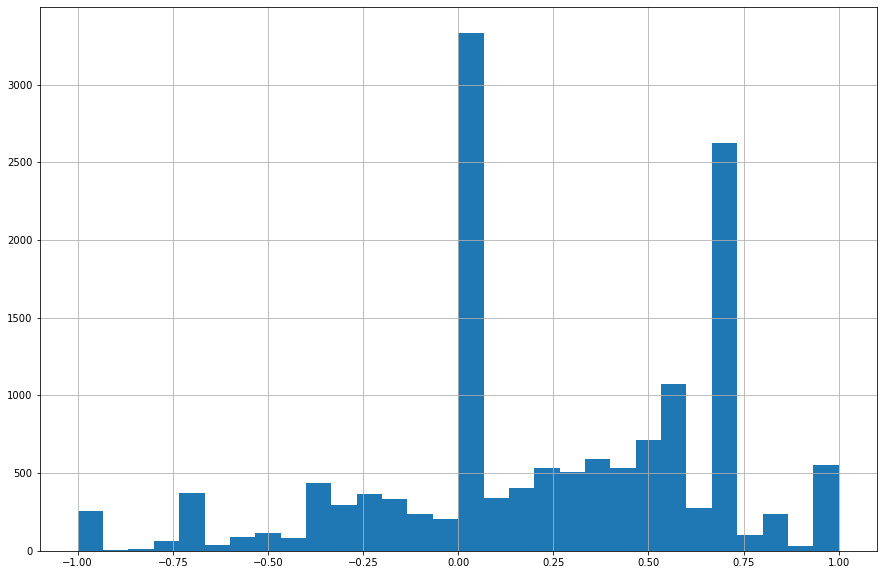

In [22]:
df2['polarity_TextBlob'].hist(bins=30, figsize=(15,10))

1. polarity is almost normal and positive 
2. polarity is max between 0 to 0.75, shows reviews have positive sentiment

##  ( WordCloud ) 

###  Positive 

In [23]:
pos_content = df2[df2.sentiment_TextBlob == 'Positive']
pos_content = pos_content.sort_values(['polarity_TextBlob'], ascending= False)

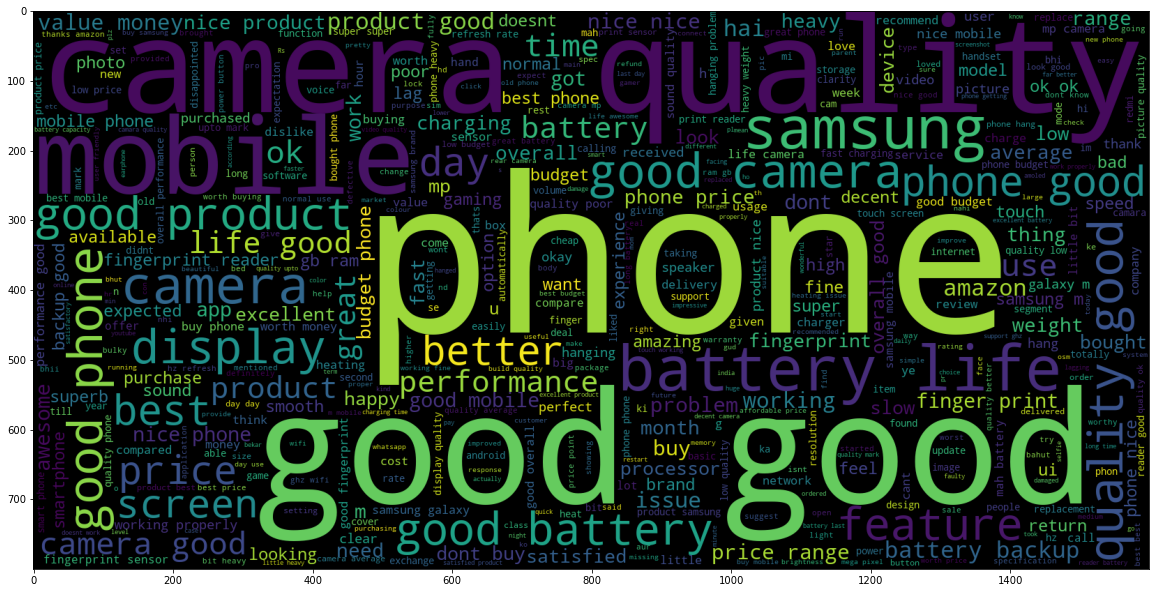

In [24]:
from wordcloud import WordCloud

text = ' '.join([word for word in pos_content['Content']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud)

### Negative

In [25]:
neg_content = df2[df2.sentiment_TextBlob == 'Negative']
neg_content = neg_content.sort_values(['polarity_TextBlob'], ascending= False)

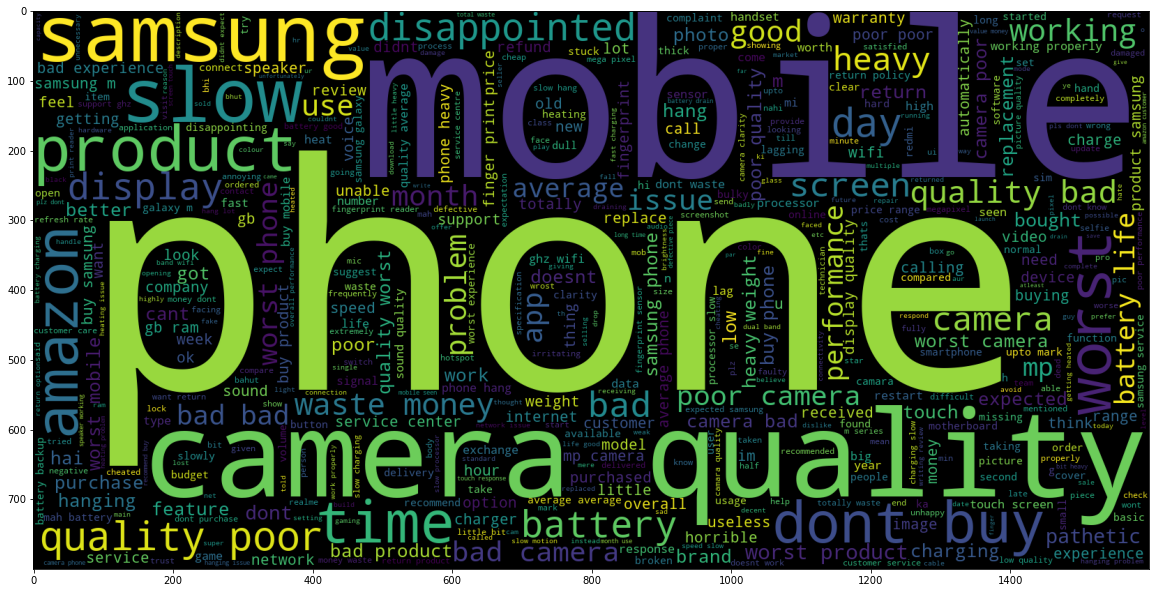

In [26]:
text = ' '.join([word for word in neg_content['Content']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud)

## 2.2 [ VANDER ]

In [27]:
#import VADER sentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [28]:
vader_sentiment = SentimentIntensityAnalyzer()
df2['polarity_VADER'] = df2['Content'].apply(lambda s: vader_sentiment.polarity_scores(s)['compound'])


In [29]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label>=0:
        return "Positive"

In [30]:
df2['sentiment_VADER'] = df2['polarity_VADER'].apply(sentiment)

In [31]:
print(df2['sentiment_TextBlob'].value_counts())
df2.head()

Positive    11844
Negative     2908
Name: sentiment_TextBlob, dtype: int64


,Content,polarity_TextBlob,sentiment_TextBlob,polarity_VADER,sentiment_VADER
0,month bought mobile intial day onwards interne...,-0.500000,Negative,-0.7096,Negative
1,phone completely ridiculous useless phone gett...,-0.416667,Negative,-0.7070,Negative
2,giving review phone phone having issue speaker...,-1.000000,Negative,-0.2500,Negative
3,dont purchase worst phone got lacked month wor...,-0.766667,Negative,-0.2037,Negative
4,slow process compatible waist money return phone,-0.300000,Negative,0.0000,Positive


<AxesSubplot:xlabel='sentiment_VADER', ylabel='count'>

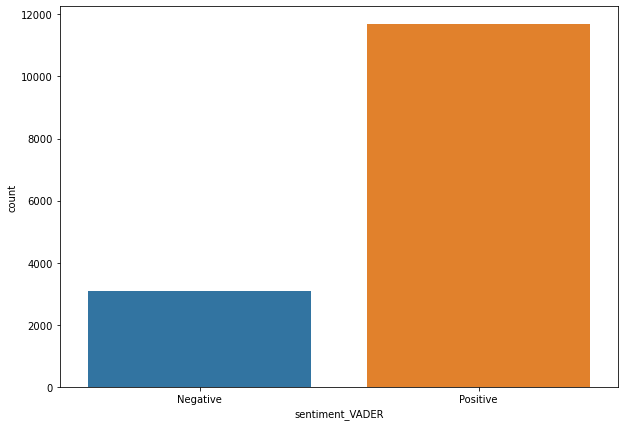

In [32]:
fig = plt.figure(figsize=(10,7))
sns.countplot(x='sentiment_VADER', data = df2)

<AxesSubplot:>

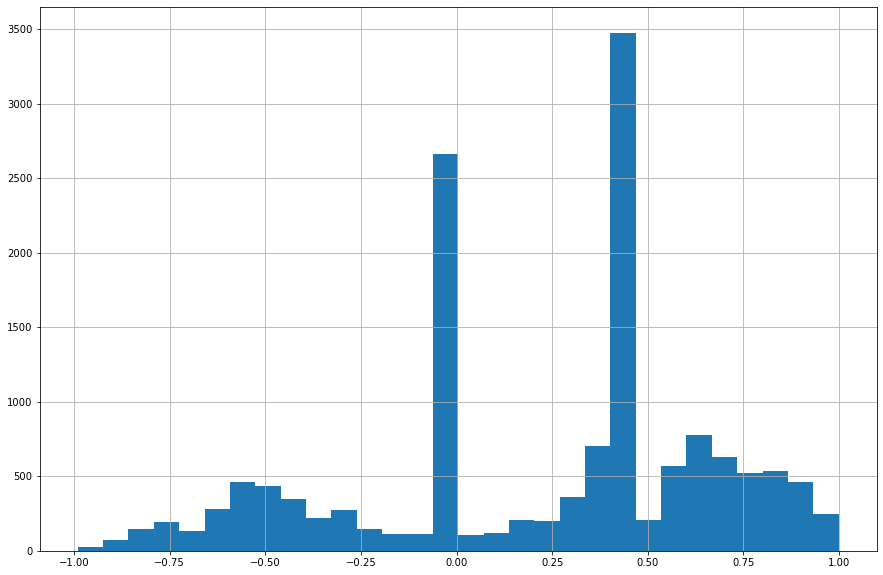

In [33]:
df2['polarity_VADER'].hist(bins=30, figsize=(15,10))

## (WordCloud)

### Positive

In [34]:
pos_content = df2[df2.sentiment_VADER == 'Positive']
pos_content = pos_content.sort_values(['polarity_VADER'], ascending= False)

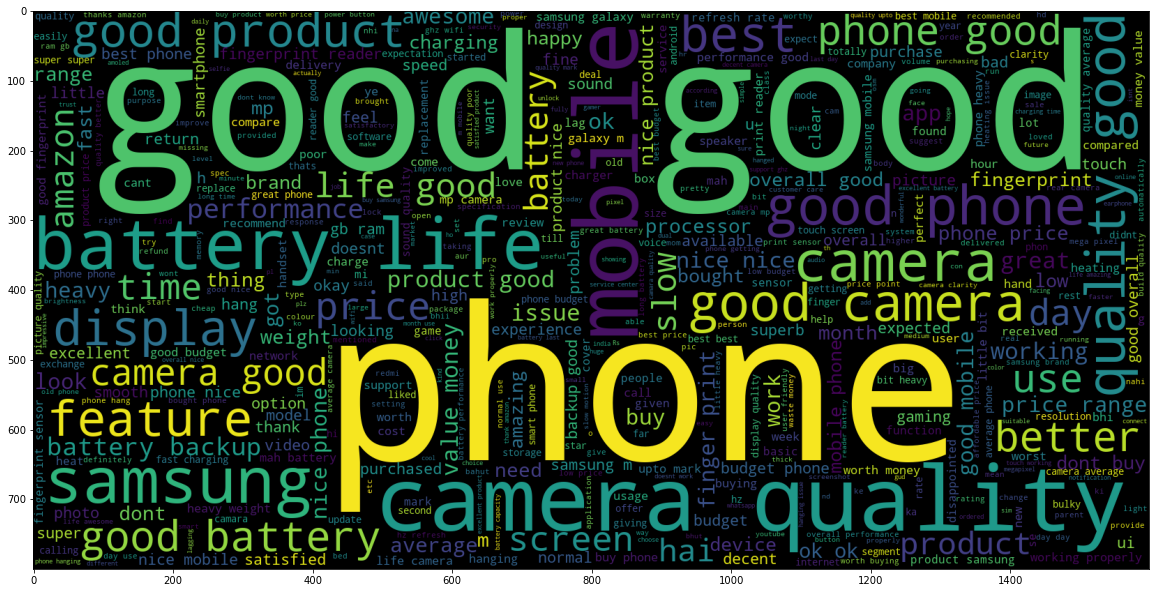

In [35]:
from wordcloud import WordCloud

text = ' '.join([word for word in pos_content['Content']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud)

### Negative

In [36]:
neg_content = df2[df2.sentiment_VADER == 'Negative']
neg_content = neg_content.sort_values(['polarity_VADER'], ascending= False)

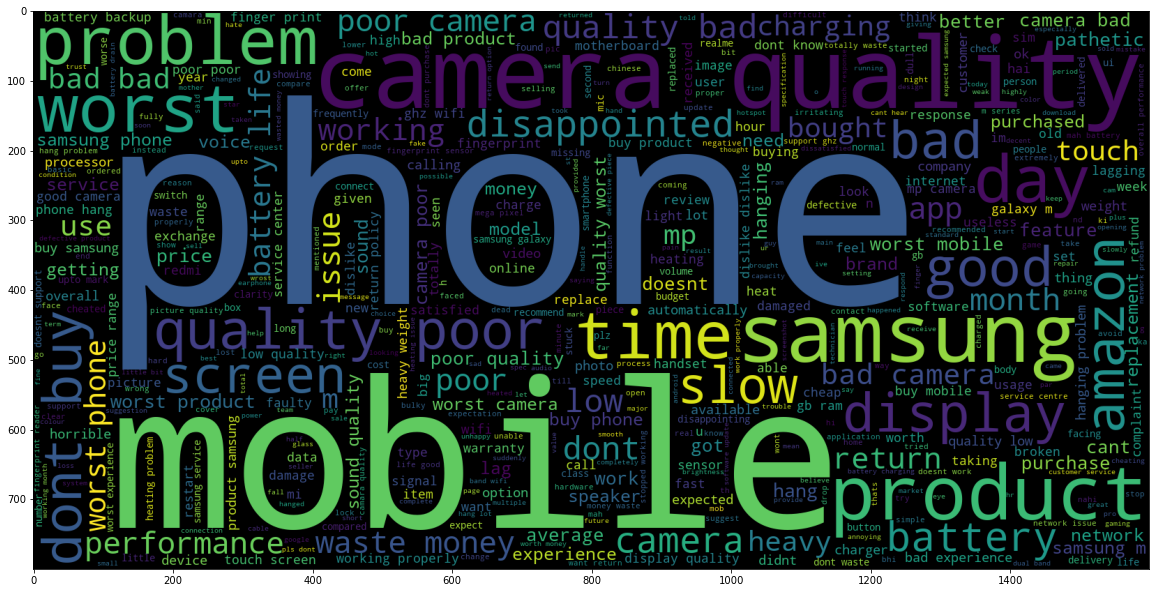

In [37]:
text = ' '.join([word for word in neg_content['Content']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud)

In [38]:
df2.to_csv("FinalSentiment.csv")

# 4. Model Building

In [39]:
df2.head()

,Content,polarity_TextBlob,sentiment_TextBlob,polarity_VADER,sentiment_VADER
0,month bought mobile intial day onwards interne...,-0.500000,Negative,-0.7096,Negative
1,phone completely ridiculous useless phone gett...,-0.416667,Negative,-0.7070,Negative
2,giving review phone phone having issue speaker...,-1.000000,Negative,-0.2500,Negative
3,dont purchase worst phone got lacked month wor...,-0.766667,Negative,-0.2037,Negative
4,slow process compatible waist money return phone,-0.300000,Negative,0.0000,Positive


## 4.1.1  Applying NB on TextBlob

In [40]:
# Split into training and testing data
from sklearn.model_selection import train_test_split
x = df2['Content']
y = df2['sentiment_TextBlob']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

In [42]:
from sklearn.naive_bayes import MultinomialNB

modelT = MultinomialNB()
modelT.fit(x, y)


MultinomialNB()

In [43]:
modelT.score(x_test, y_test)

0.9140455531453362

In [44]:
from sklearn.naive_bayes import GaussianNB

modelT2 = GaussianNB()
modelT2.fit(x, y)

modelT2.score(x_test, y_test)

0.35059652928416485

In [45]:
from sklearn.naive_bayes import BernoulliNB

modelT3 = BernoulliNB()
modelT3.fit(x, y)
modelT3.score(x_test, y_test)

0.84029284164859

In [46]:
from sklearn.naive_bayes import ComplementNB

modelT4 = ComplementNB()
modelT4.fit(x, y)
modelT4.score(x_test, y_test)

0.8744577006507592

## 4.1.2  Applying NB on VADER

In [47]:
# Split into training and testing data
from sklearn.model_selection import train_test_split
x1 = df2['Content']
y1 = df2['sentiment_VADER']
x1, x1_test, y1, y1_test = train_test_split(x1,y1, stratify=y1, test_size=0.25, random_state=42)

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(stop_words='english')
x1 = vec.fit_transform(x1).toarray()
x1_test = vec.transform(x1_test).toarray()

In [49]:
from sklearn.naive_bayes import MultinomialNB

modelV = MultinomialNB()
modelV.fit(x1, y1)

MultinomialNB()

In [50]:
modelV.score(x1_test, y1_test)

0.9042841648590022

In [51]:
from sklearn.naive_bayes import GaussianNB

modelV2 = GaussianNB()
modelV2.fit(x1, y1)

modelV2.score(x1_test, y1_test)

0.34137744034707157

In [52]:
from sklearn.naive_bayes import BernoulliNB

modelV3 = BernoulliNB()
modelV3.fit(x1, y1)
modelV3.score(x1_test, y1_test)

0.8302603036876356

In [53]:
from sklearn.naive_bayes import ComplementNB

modelV4 = ComplementNB()
modelV4.fit(x1, y1)
modelV4.score(x1_test, y1_test)

0.8568329718004338

## 4.2.1  TextBlob

In [54]:
df3 = pd.read_csv('FinalSentiment.csv')
df3.drop(['polarity_VADER','Unnamed: 0','sentiment_VADER'], axis = 1, inplace = True)
df3.head()

,Content,polarity_TextBlob,sentiment_TextBlob
0,month bought mobile intial day onwards interne...,-0.500000,Negative
1,phone completely ridiculous useless phone gett...,-0.416667,Negative
2,giving review phone phone having issue speaker...,-1.000000,Negative
3,dont purchase worst phone got lacked month wor...,-0.766667,Negative
4,slow process compatible waist money return phone,-0.300000,Negative


In [55]:
df3['sentiment_TextBlob'] = df3['sentiment_TextBlob'].map({'Positive':1, 'Negative': 0})
df3.head()

,Content,polarity_TextBlob,sentiment_TextBlob
0,month bought mobile intial day onwards interne...,-0.500000,0
1,phone completely ridiculous useless phone gett...,-0.416667,0
2,giving review phone phone having issue speaker...,-1.000000,0
3,dont purchase worst phone got lacked month wor...,-0.766667,0
4,slow process compatible waist money return phone,-0.300000,0


In [56]:
X = df3['Content'].values.astype(str)
y = df3['sentiment_TextBlob']

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20, stratify=y)

print('Number of reviews in the total set : {}'.format(len(X)))
print('Number of reviews in the training set : {}'.format(len(X_train)))
print('Number of reviews in the testing set : {}'.format(len(X_test)))

Number of reviews in the total set : 14752
Number of reviews in the training set : 11064
Number of reviews in the testing set : 3688


# Using CountVectorizer

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cvx_train = cv.fit_transform(X_train).toarray()
cvx_test = cv.transform(X_test).toarray()

### Logistic Regression 

In [59]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression()
classifier.fit(cvx_train,y_train)

print(classifier.fit(cvx_train,y_train))

# Predict for x dataset
y_pred=classifier.predict(cvx_train)


print("_______________________________________________")
    

# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train,y_pred)
print (f'confusion_matrix:\n{confusion_matrix}')


print("_______________________________________________")


# The model accuracy is calculated by (a+d)/(a+b+c+d)
auc = (2068+8845)/(2068+113+38+8845)
print(f'train accuracy:{auc}')


print("_______________________________________________")


#Classification report
from sklearn.metrics import classification_report
print(f'Classification report:\n{classification_report(y_train,y_pred)}')


print("_______________________________________________")


print(" test accuracy: ",classifier.score(cvx_test,y_test))

LogisticRegression()
_______________________________________________
confusion_matrix:
[[2068  113]
 [  38 8845]]
_______________________________________________
train accuracy:0.986352133044107
_______________________________________________
Classification report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2181
           1       0.99      1.00      0.99      8883

    accuracy                           0.99     11064
   macro avg       0.98      0.97      0.98     11064
weighted avg       0.99      0.99      0.99     11064

_______________________________________________
 test accuracy:  0.9547180043383948


### KNN 

In [60]:
from sklearn.neighbors import KNeighborsClassifier
 
knn = KNeighborsClassifier(n_neighbors = 1)
 
knn.fit(cvx_train, y_train)
pred = knn.predict(cvx_test)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

knn_cm = confusion_matrix(y_test, pred)
print(f'KNN Confusion Matrix:\n{knn_cm}')
 
print("_______________________________________________")


knn_clr = classification_report(y_test, pred)
print(f'KNN Classification Report:\n{knn_clr}')


print("_______________________________________________")


accuracy = (484+2849)/(484+243+112+2849)
print(f' Random Forest Acc:{accuracy}')

KNN Confusion Matrix:
[[ 484  243]
 [ 112 2849]]
_______________________________________________
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.67      0.73       727
           1       0.92      0.96      0.94      2961

    accuracy                           0.90      3688
   macro avg       0.87      0.81      0.84      3688
weighted avg       0.90      0.90      0.90      3688

_______________________________________________
 Random Forest Acc:0.9037418655097614


### Random Forest 

In [94]:
from sklearn.ensemble import RandomForestClassifier

ram = RandomForestClassifier(n_estimators = 150,criterion = 'entropy')
ram.fit(cvx_train,y_train)

y_pred = ram.predict(cvx_test)

In [96]:
ram_cm = confusion_matrix(y_test, y_pred)
print(f'Random Forest CM:\n{ram_cm}')


print("_______________________________________________")


ram_cr = classification_report(y_test, y_pred)
print(f'Random Forest Classification Report:\n{ram_cr}')


print("_______________________________________________")


accuracy = (628+2854)/(628+141+65+2854)
print(f' Random Forest Acc:{accuracy}')

Random Forest CM:
[[ 628  141]
 [  65 2854]]
_______________________________________________
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       769
           1       0.95      0.98      0.97      2919

    accuracy                           0.94      3688
   macro avg       0.93      0.90      0.91      3688
weighted avg       0.94      0.94      0.94      3688

_______________________________________________
 Random Forest Acc:0.9441431670281996


# Using TfidfVectorizer

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization=TfidfVectorizer()
tfvx_train=vectorization.fit_transform(X_train)
tfvx_test=vectorization.transform(X_test)

### Logistic Regression

In [65]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression()
classifier.fit(tfvx_train,y_train)

print(classifier.fit(tfvx_train,y_train))

# Predict for x dataset
y_pred=classifier.predict(tfvx_train)


print("_______________________________________________")
    

# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train,y_pred)
print (f'confusion_matrix:\n{confusion_matrix}')


print("_______________________________________________")


# The model accuracy is calculated by (a+d)/(a+b+c+d)
auc = (1745+8842)/(1745+436+41+8842)
print(f'train accuracy:{auc}')


print("_______________________________________________")


#Classification report
from sklearn.metrics import classification_report
print(f'Classification report:\n{classification_report(y_train,y_pred)}')


print("_______________________________________________")


print(" test accuracy: ",classifier.score(tfvx_test,y_test))

LogisticRegression()
_______________________________________________
confusion_matrix:
[[1745  436]
 [  41 8842]]
_______________________________________________
train accuracy:0.9568872017353579
_______________________________________________
Classification report:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      2181
           1       0.95      1.00      0.97      8883

    accuracy                           0.96     11064
   macro avg       0.97      0.90      0.93     11064
weighted avg       0.96      0.96      0.96     11064

_______________________________________________
 test accuracy:  0.9441431670281996


### KNN Using TfidfVectorizer

In [66]:
from sklearn.neighbors import KNeighborsClassifier
 
knn = KNeighborsClassifier(n_neighbors = 1)
 
knn.fit(tfvx_train, y_train)
pred = knn.predict(tfvx_test)

In [67]:
from sklearn.metrics import classification_report, confusion_matrix

knn_cm = confusion_matrix(y_test, pred)
print(f'KNN Confusion Matrix:\n{knn_cm}')
 
print("_______________________________________________")


knn_clr = classification_report(y_test, pred)
print(f'KNN Classification Report:\n{knn_clr}')


print("_______________________________________________")


accuracy = (321+2864)/(321+406+97+2864)
print(f' KNN Acc:{accuracy}')

KNN Confusion Matrix:
[[ 321  406]
 [  97 2864]]
_______________________________________________
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.44      0.56       727
           1       0.88      0.97      0.92      2961

    accuracy                           0.86      3688
   macro avg       0.82      0.70      0.74      3688
weighted avg       0.85      0.86      0.85      3688

_______________________________________________
 KNN Acc:0.8636117136659436


### Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier

ram = RandomForestClassifier(n_estimators = 150,criterion = 'entropy')
ram.fit(tfvx_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150)

In [98]:
y_pred = ram.predict(cvx_test)

In [100]:
ram_cm = confusion_matrix(y_test, y_pred)
print(f'Random Forest CM:\n{ram_cm}')


print("_______________________________________________")


ram_cr = classification_report(y_test, y_pred)
print(f'Random Forest Classification Report:\n{ram_cr}')


print("_______________________________________________")


accuracy = (513+2888)/(513+256+31+2888)
print(f' Random Forest Acc:{accuracy}')

Random Forest CM:
[[ 513  256]
 [  31 2888]]
_______________________________________________
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.67      0.78       769
           1       0.92      0.99      0.95      2919

    accuracy                           0.92      3688
   macro avg       0.93      0.83      0.87      3688
weighted avg       0.92      0.92      0.92      3688

_______________________________________________
 Random Forest Acc:0.922180043383948


## 4.2.2  VADER

In [71]:
df4 = pd.read_csv('FinalSentiment.csv')
df4.drop(['Unnamed: 0','polarity_TextBlob','sentiment_TextBlob'], axis = 1 , inplace = True)


In [72]:
df4['sentiment_VADER'] = df4['sentiment_VADER'].map({'Positive':1, 'Negative': 0})
df4.head()

,Content,polarity_VADER,sentiment_VADER
0,month bought mobile intial day onwards interne...,-0.7096,0
1,phone completely ridiculous useless phone gett...,-0.7070,0
2,giving review phone phone having issue speaker...,-0.2500,0
3,dont purchase worst phone got lacked month wor...,-0.2037,0
4,slow process compatible waist money return phone,0.0000,1


In [73]:
X = df4['Content'].values.astype(str)
y = df4['sentiment_VADER']

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20, stratify=y)

print('Number of reviews in the total set : {}'.format(len(X)))
print('Number of reviews in the training set : {}'.format(len(X_train)))
print('Number of reviews in the testing set : {}'.format(len(X_test)))

Number of reviews in the total set : 14752
Number of reviews in the training set : 11064
Number of reviews in the testing set : 3688


# Using CountVectorizer

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cvx_train = cv.fit_transform(X_train).toarray()
cvx_test = cv.transform(X_test).toarray()

### Logistic Regression

In [76]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression()
print(classifier.fit(cvx_train,y_train))

# Predict for x dataset
y_pred=classifier.predict(cvx_train)


print("_______________________________________________")
    

# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train,y_pred)
print (f'confusion_matrix:\n{confusion_matrix}')


print("_______________________________________________")


# The model accuracy is calculated by (a+d)/(a+b+c+d)
auc=(2103+8694)/(2103+206+61+8694)
print(f'train accuracy:{auc}')


print("_______________________________________________")


#Classification report
from sklearn.metrics import classification_report
print(f'Classification report:\n{classification_report(y_train,y_pred)}')


print("_______________________________________________")


print(" test accuracy: ",classifier.score(cvx_test,y_test))

LogisticRegression()
_______________________________________________
confusion_matrix:
[[2103  206]
 [  61 8694]]
_______________________________________________
train accuracy:0.9758676789587852
_______________________________________________
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      2309
           1       0.98      0.99      0.98      8755

    accuracy                           0.98     11064
   macro avg       0.97      0.95      0.96     11064
weighted avg       0.98      0.98      0.98     11064

_______________________________________________
 test accuracy:  0.9479392624728851


### KNN using CountVectorizer

In [77]:
from sklearn.neighbors import KNeighborsClassifier
 
knn = KNeighborsClassifier(n_neighbors = 1)
 
knn.fit(cvx_train, y_train)
pred = knn.predict(cvx_test)


In [78]:
from sklearn.metrics import classification_report, confusion_matrix

knn_cm = confusion_matrix(y_test, pred)
print(f'KNN Confusion Matrix:\n{knn_cm}')
 
print("_______________________________________________")


knn_clr = classification_report(y_test, pred)
print(f'KNN Classification Report:\n{knn_clr}')


print("_______________________________________________")


accuracy = (483+2800)/(483+286+119+2800)
print(f' KNN Accuracy:{accuracy}')

KNN Confusion Matrix:
[[ 483  286]
 [ 119 2800]]
_______________________________________________
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.63      0.70       769
           1       0.91      0.96      0.93      2919

    accuracy                           0.89      3688
   macro avg       0.85      0.79      0.82      3688
weighted avg       0.89      0.89      0.89      3688

_______________________________________________
 KNN Accuracy:0.8901843817787418


### Random Forest Using CountVectorizer

In [101]:
from sklearn.ensemble import RandomForestClassifier

ram = RandomForestClassifier(n_estimators = 150,criterion = 'entropy')
ram.fit(cvx_train,y_train)

y_pred = ram.predict(cvx_test)

In [103]:
ram_cm = confusion_matrix(y_test, y_pred)
print(f'Random Forest CM:\n{ram_cm}')


print("_______________________________________________")


ram_cr = classification_report(y_test, y_pred)
print(f'Random Forest Classification Report:\n{ram_cr}')


print("_______________________________________________")


accuracy = (622+2849)/(622+147+70+2849)
print(f' Random Forest Acc:{accuracy}')

Random Forest CM:
[[ 622  147]
 [  70 2849]]
_______________________________________________
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       769
           1       0.95      0.98      0.96      2919

    accuracy                           0.94      3688
   macro avg       0.92      0.89      0.91      3688
weighted avg       0.94      0.94      0.94      3688

_______________________________________________
 Random Forest Acc:0.9411605206073753


# Using TfidfVectorizer

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization=TfidfVectorizer()
tfvx_train=vectorization.fit_transform(X_train)
tfvx_test=vectorization.transform(X_test)

### Logistic Regression

In [82]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression()
classifier.fit(tfvx_train,y_train)

print(classifier.fit(tfvx_train,y_train))

# Predict for x dataset
y_pred=classifier.predict(tfvx_train)


print("_______________________________________________")
    

# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train,y_pred)
print (f'confusion_matrix:\n{confusion_matrix}')


print("_______________________________________________")


# The model accuracy is calculated by (a+d)/(a+b+c+d)
auc = (1795+8681)/(1795+514+74+8681)
print(f' train accuracy:{auc}')


print("_______________________________________________")


#Classification report
from sklearn.metrics import classification_report
print(f'Classification report:\n{classification_report(y_train,y_pred)}')


print("_______________________________________________")


print(" test accuracy: ",classifier.score(tfvx_test,y_test))

LogisticRegression()
_______________________________________________
confusion_matrix:
[[1795  514]
 [  74 8681]]
_______________________________________________
 train accuracy:0.9468546637744034
_______________________________________________
Classification report:
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      2309
           1       0.94      0.99      0.97      8755

    accuracy                           0.95     11064
   macro avg       0.95      0.88      0.91     11064
weighted avg       0.95      0.95      0.94     11064

_______________________________________________
 test accuracy:  0.938177874186551


### KNN using TF-IDF

In [83]:
from sklearn.neighbors import KNeighborsClassifier
 
knn = KNeighborsClassifier(n_neighbors = 1)
 
knn.fit(tfvx_train, y_train)
pred = knn.predict(tfvx_test)

In [84]:
from sklearn.metrics import classification_report, confusion_matrix

knn_cm = confusion_matrix(y_test,pred)
print(f'KNN Confusion Matrix:\n{knn_cm}')

 
print("_______________________________________________")


knn_clr = classification_report(y_test,pred)
print(f'KNN Classification Report:\n{knn_clr}')


print("_______________________________________________")


accuracy = (348+2829)/(348+421+90+2829)
print(f' KNN Acc:{accuracy}')

KNN Confusion Matrix:
[[ 348  421]
 [  90 2829]]
_______________________________________________
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.45      0.58       769
           1       0.87      0.97      0.92      2919

    accuracy                           0.86      3688
   macro avg       0.83      0.71      0.75      3688
weighted avg       0.85      0.86      0.85      3688

_______________________________________________
 KNN Acc:0.8614425162689805


### Random Forest Using TF-IDF

In [104]:
from sklearn.ensemble import RandomForestClassifier

ram = RandomForestClassifier(n_estimators = 150,criterion = 'entropy')
ram.fit(tfvx_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150)

In [105]:
y_pred = ram.predict(tfvx_test)

In [107]:
ram_cm = confusion_matrix(y_test, y_pred)
print(f'Random Forest CM:\n{ram_cm}')


print("_______________________________________________")


ram_cr = classification_report(y_test, y_pred)
print(f'Random Forest Classification Report:\n{ram_cr}')


print("_______________________________________________")


accuracy = (602+2874)/(602+167+48+2874)
print(f' Random Forest Acc:{accuracy}')

Random Forest CM:
[[ 602  167]
 [  45 2874]]
_______________________________________________
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.78      0.85       769
           1       0.95      0.98      0.96      2919

    accuracy                           0.94      3688
   macro avg       0.94      0.88      0.91      3688
weighted avg       0.94      0.94      0.94      3688

_______________________________________________
 Random Forest Acc:0.9417502031969656
